In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
earthquake = pd.read_csv('database.csv')
print(earthquake.head())

         Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0                     NaN        6.0             MW  ...   
1                     NaN        5.8             MW  ...   
2                     NaN        6.2             MW  ...   
3                     NaN        5.8             MW  ...   
4                     NaN        5.8             MW  ...   

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   
1                   

In [3]:
earthquake['Date'].dtype

dtype('O')

In [6]:
for d in earthquake['Date']:
    format = "%d/%m/%Y"
    dtobject = datetime.strptime(d, format)
    print (dtobject)


1965-02-01 00:00:00
1965-04-01 00:00:00
1965-05-01 00:00:00
1965-08-01 00:00:00
1965-09-01 00:00:00
1965-10-01 00:00:00
1965-12-01 00:00:00


ValueError: time data '01/15/1965' does not match format '%d/%m/%Y'

strptime() method is not helpful in converting the date time for all rows as some of the rows in the series object are in different format

It only works if all rows are in same format such as %d/%m/%Y. Here some rows are in %m/%d/%Y as well as some have time stamps so this method of conversion failed

In [59]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

Above information shows that that date is an object data type. It need to be converted to date time data type

In [60]:
date_lengths = earthquake['Date'].str.len()
print(date_lengths)

0        10
1        10
2        10
3        10
4        10
         ..
23407    10
23408    10
23409    10
23410    10
23411    10
Name: Date, Length: 23412, dtype: int64


In [61]:
print(date_lengths.value_counts())

Date
10    23409
24        3
Name: count, dtype: int64


In [62]:
indices = earthquake[date_lengths == 24]
#earthquake['Date'][3378]
print(indices)


                           Date                      Time  Latitude  \
3378   1975-02-23T02:58:41.000Z  1975-02-23T02:58:41.000Z     8.017   
7512   1985-04-28T02:53:41.530Z  1985-04-28T02:53:41.530Z   -32.998   
20650  2011-03-13T02:23:34.520Z  2011-03-13T02:23:34.520Z    36.344   

       Longitude        Type  Depth  Depth Error  Depth Seismic Stations  \
3378     124.075  Earthquake  623.0          NaN                     NaN   
7512     -71.766  Earthquake   33.0          NaN                     NaN   
20650    142.344  Earthquake   10.1         13.9                   289.0   

       Magnitude Magnitude Type  ...  Magnitude Seismic Stations  \
3378         5.6             MB  ...                         NaN   
7512         5.6             MW  ...                         NaN   
20650        5.8            MWC  ...                         NaN   

       Azimuthal Gap  Horizontal Distance  Horizontal Error  Root Mean Square  \
3378             NaN                  NaN               

In [65]:
earthquake.loc[3378,"Date"] = '23/02/1975'
earthquake.loc[7512,"Date"] = '28/04/1985'
earthquake.loc[20650,"Date"] = '13/03/2011'

In [67]:
earthquake['dateformat'] = pd.to_datetime(earthquake['Date'], format = "mixed")
print(earthquake['dateformat'])

0       1965-01-02
1       1965-01-04
2       1965-01-05
3       1965-01-08
4       1965-01-09
           ...    
23407   2016-12-28
23408   2016-12-28
23409   2016-12-28
23410   2016-12-29
23411   2016-12-30
Name: dateformat, Length: 23412, dtype: datetime64[ns]


In [71]:
type(earthquake['dateformat'])

pandas.core.series.Series

In [70]:
earthquake['dateformat'].dtype

dtype('<M8[ns]')

In [72]:
print(earthquake['dateformat'])

0       1965-01-02
1       1965-01-04
2       1965-01-05
3       1965-01-08
4       1965-01-09
           ...    
23407   2016-12-28
23408   2016-12-28
23409   2016-12-28
23410   2016-12-29
23411   2016-12-30
Name: dateformat, Length: 23412, dtype: datetime64[ns]


In [74]:
earthquake['Date'] = earthquake['dateformat']

In [75]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        23412 non-null  datetime64[ns]
 1   Time                        23412 non-null  object        
 2   Latitude                    23412 non-null  float64       
 3   Longitude                   23412 non-null  float64       
 4   Type                        23412 non-null  object        
 5   Depth                       23412 non-null  float64       
 6   Depth Error                 4461 non-null   float64       
 7   Depth Seismic Stations      7097 non-null   float64       
 8   Magnitude                   23412 non-null  float64       
 9   Magnitude Type              23409 non-null  object        
 10  Magnitude Error             327 non-null    float64       
 11  Magnitude Seismic Stations  2564 non-null   float64   

In [76]:
earthquake.drop('dateformat',axis = 1)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1965-01-02,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1965-01-04,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1965-01-05,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1965-01-08,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1965-01-09,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,2016-12-28,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,2016-12-28,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,2016-12-28,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,2016-12-29,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [77]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        23412 non-null  datetime64[ns]
 1   Time                        23412 non-null  object        
 2   Latitude                    23412 non-null  float64       
 3   Longitude                   23412 non-null  float64       
 4   Type                        23412 non-null  object        
 5   Depth                       23412 non-null  float64       
 6   Depth Error                 4461 non-null   float64       
 7   Depth Seismic Stations      7097 non-null   float64       
 8   Magnitude                   23412 non-null  float64       
 9   Magnitude Type              23409 non-null  object        
 10  Magnitude Error             327 non-null    float64       
 11  Magnitude Seismic Stations  2564 non-null   float64   

In [78]:
earthquake['Depth Error']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
23407    1.2
23408    2.0
23409    1.8
23410    1.8
23411    2.2
Name: Depth Error, Length: 23412, dtype: float64

In [79]:
earthquake['Depth Error'].isna().value_counts()

Depth Error
True     18951
False     4461
Name: count, dtype: int64

Shows it has 4461 empty rows

In [80]:
earthquake['Depth Error'] = earthquake['Depth Error'].fillna(value = 0)

In [81]:
earthquake['Depth Error'].isna().value_counts()

Depth Error
False    23412
Name: count, dtype: int64

Above result shows there are no null values at all for Depth Error column

In [82]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        23412 non-null  datetime64[ns]
 1   Time                        23412 non-null  object        
 2   Latitude                    23412 non-null  float64       
 3   Longitude                   23412 non-null  float64       
 4   Type                        23412 non-null  object        
 5   Depth                       23412 non-null  float64       
 6   Depth Error                 23412 non-null  float64       
 7   Depth Seismic Stations      7097 non-null   float64       
 8   Magnitude                   23412 non-null  float64       
 9   Magnitude Type              23409 non-null  object        
 10  Magnitude Error             327 non-null    float64       
 11  Magnitude Seismic Stations  2564 non-null   float64   

In [84]:
earthquake['Magnitude Type'].isnull().value_counts()

Magnitude Type
False    23409
True         3
Name: count, dtype: int64

In [92]:
import matplotlib as plt

<Axes: xlabel='Magnitude Type'>

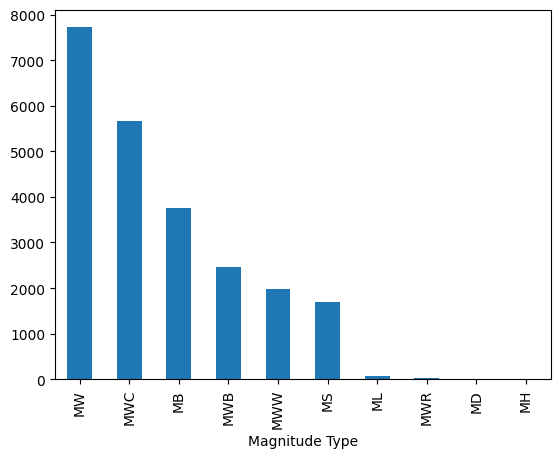

In [93]:
earthquake['Magnitude Type'].value_counts().plot(kind='bar')

In [95]:
earthquake[earthquake['Magnitude Type'].isnull()]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,dateformat
6703,1983-08-24,13:36:00,40.3732,-124.9227,Earthquake,11.93,0.0,NaN,5.70,NaN,...,NaN,NaN,NaN,NaN,ATLAS19830824133600,ATLAS,ATLAS,ATLAS,Automatic,1983-08-24
7294,1984-11-23,18:08:00,37.4600,-118.5900,Earthquake,9.00,0.0,NaN,5.82,NaN,...,NaN,NaN,NaN,NaN,ATLAS19841123180800,ATLAS,ATLAS,ATLAS,Automatic,1984-11-23
7919,1986-03-31,11:55:00,37.4788,-121.6858,Earthquake,9.17,0.0,NaN,5.60,NaN,...,NaN,NaN,NaN,NaN,ATLAS19860331115500,ATLAS,ATLAS,ATLAS,Automatic,1986-03-31


In [96]:
earthquake.loc[6703,"Magnitude Type"] = "MW"
earthquake.loc[7294,"Magnitude Type"] = "MW"
earthquake.loc[7919,"Magnitude Type"] = "MW"

In [97]:
earthquake['Magnitude Type'].isna().value_counts()

Magnitude Type
False    23412
Name: count, dtype: int64

It shows all there are no null values in the column

In [99]:
earthquake['Magnitude Type'].value_counts()

Magnitude Type
MW     7725
MWC    5669
MB     3761
MWB    2458
MWW    1983
MS     1702
ML       77
MWR      26
MD        6
MH        5
Name: count, dtype: int64

In [100]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        23412 non-null  datetime64[ns]
 1   Time                        23412 non-null  object        
 2   Latitude                    23412 non-null  float64       
 3   Longitude                   23412 non-null  float64       
 4   Type                        23412 non-null  object        
 5   Depth                       23412 non-null  float64       
 6   Depth Error                 23412 non-null  float64       
 7   Depth Seismic Stations      7097 non-null   float64       
 8   Magnitude                   23412 non-null  float64       
 9   Magnitude Type              23412 non-null  object        
 10  Magnitude Error             327 non-null    float64       
 11  Magnitude Seismic Stations  2564 non-null   float64   

In [102]:
earthquake.drop('dateformat',axis=1, inplace= True)

In [103]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        23412 non-null  datetime64[ns]
 1   Time                        23412 non-null  object        
 2   Latitude                    23412 non-null  float64       
 3   Longitude                   23412 non-null  float64       
 4   Type                        23412 non-null  object        
 5   Depth                       23412 non-null  float64       
 6   Depth Error                 23412 non-null  float64       
 7   Depth Seismic Stations      7097 non-null   float64       
 8   Magnitude                   23412 non-null  float64       
 9   Magnitude Type              23412 non-null  object        
 10  Magnitude Error             327 non-null    float64       
 11  Magnitude Seismic Stations  2564 non-null   float64   

In [104]:
earthquake.drop(['Depth Seismic Stations','Magnitude Error'],axis=1, inplace= True)

In [105]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        23412 non-null  datetime64[ns]
 1   Time                        23412 non-null  object        
 2   Latitude                    23412 non-null  float64       
 3   Longitude                   23412 non-null  float64       
 4   Type                        23412 non-null  object        
 5   Depth                       23412 non-null  float64       
 6   Depth Error                 23412 non-null  float64       
 7   Magnitude                   23412 non-null  float64       
 8   Magnitude Type              23412 non-null  object        
 9   Magnitude Seismic Stations  2564 non-null   float64       
 10  Azimuthal Gap               7299 non-null   float64       
 11  Horizontal Distance         1604 non-null   float64   

In [106]:
earthquake.drop(['Magnitude Seismic Stations','Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square'], axis=1, inplace=True)

In [107]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              23412 non-null  datetime64[ns]
 1   Time              23412 non-null  object        
 2   Latitude          23412 non-null  float64       
 3   Longitude         23412 non-null  float64       
 4   Type              23412 non-null  object        
 5   Depth             23412 non-null  float64       
 6   Depth Error       23412 non-null  float64       
 7   Magnitude         23412 non-null  float64       
 8   Magnitude Type    23412 non-null  object        
 9   ID                23412 non-null  object        
 10  Source            23412 non-null  object        
 11  Location Source   23412 non-null  object        
 12  Magnitude Source  23412 non-null  object        
 13  Status            23412 non-null  object        
dtypes: datetime64[ns](1), 

In [108]:
correlation_df = earthquake[['Type','Magnitude Type','Source','Location Source','Magnitude Source','Status']]
print(correlation_df.head())

         Type Magnitude Type  Source Location Source Magnitude Source  \
0  Earthquake             MW  ISCGEM          ISCGEM           ISCGEM   
1  Earthquake             MW  ISCGEM          ISCGEM           ISCGEM   
2  Earthquake             MW  ISCGEM          ISCGEM           ISCGEM   
3  Earthquake             MW  ISCGEM          ISCGEM           ISCGEM   
4  Earthquake             MW  ISCGEM          ISCGEM           ISCGEM   

      Status  
0  Automatic  
1  Automatic  
2  Automatic  
3  Automatic  
4  Automatic  


In [109]:
correlation_df['Type'].value_counts()

Type
Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: count, dtype: int64

In [110]:
correlation_df['Magnitude Type'].value_counts()

Magnitude Type
MW     7725
MWC    5669
MB     3761
MWB    2458
MWW    1983
MS     1702
ML       77
MWR      26
MD        6
MH        5
Name: count, dtype: int64

In [111]:
correlation_df['Source'].value_counts()

Source
US           20630
ISCGEM        2460
ISCGEMSUP      120
CI              61
GCMT            55
NC              51
AK              12
OFFICIAL         8
UW               6
NN               4
ATLAS            3
SE               1
PR               1
Name: count, dtype: int64

In [112]:
correlation_df['Location Source'].value_counts()

Location Source
US        20350
ISCGEM     2581
CI           61
GCMT         56
NC           54
GUC          46
AEIC         40
UNM          21
PGC          19
WEL          18
AGS          17
ISK          15
AK           14
ATH          14
HVO          12
SPE          10
ROM           7
AEI           7
TEH           7
H             7
UW            6
US_WEL        4
NN            4
CASC          4
RSPR          3
THR           3
THE           3
JMA           3
ATLAS         3
G             2
MDD           2
B             2
TUL           2
BRK           1
U             1
AG            1
CSEM          1
OTT           1
BOU           1
SLC           1
UCR           1
BEO           1
SJA           1
CAR           1
TAP           1
SE            1
LIM           1
PR            1
Name: count, dtype: int64

In [113]:
correlation_df['Magnitude Source'].value_counts()

Magnitude Source
US          10458
HRV          8223
ISCGEM       2580
GCMT         1489
NC            533
CI             61
AK             12
PAR             9
OFFICIAL        8
GUC             6
UW              6
NIED            4
NN              4
ATLAS           3
1000            3
US_GCMT         3
PGC             2
BRK             2
1020            1
1023            1
1009            1
SE              1
US_PGC          1
PR              1
Name: count, dtype: int64

In [114]:
correlation_df['Status'].value_counts()

Status
Reviewed     20773
Automatic     2639
Name: count, dtype: int64

In [ ]:
correlation_df[correlation_df['Magnitude Source']=="US"]

,Type,Magnitude Type,Source,Location Source,Magnitude Source,Status
2575,Earthquake,MS,US,US,US,Reviewed
2576,Earthquake,MB,US,US,US,Reviewed
2577,Earthquake,MB,US,US,US,Reviewed
2578,Earthquake,MB,US,US,US,Reviewed
2579,Earthquake,MB,US,US,US,Reviewed
...,...,...,...,...,...,...
23404,Earthquake,MB,US,US,US,Reviewed
23405,Earthquake,MWW,US,US,US,Reviewed
23409,Earthquake,MWW,US,US,US,Reviewed
23410,Earthquake,MWW,US,US,US,Reviewed


In [117]:
earthquake_us = correlation_df[correlation_df['Magnitude Source']=="US"]

In [118]:
earthquake_us.head()

,Type,Magnitude Type,Source,Location Source,Magnitude Source,Status
2575,Earthquake,MS,US,US,US,Reviewed
2576,Earthquake,MB,US,US,US,Reviewed
2577,Earthquake,MB,US,US,US,Reviewed
2578,Earthquake,MB,US,US,US,Reviewed
2579,Earthquake,MB,US,US,US,Reviewed


In [123]:
earthquake_us.head()

,Type,Magnitude Type,Source,Magnitude Source,Status
2575,Earthquake,MS,US,US,Reviewed
2576,Earthquake,MB,US,US,Reviewed
2577,Earthquake,MB,US,US,Reviewed
2578,Earthquake,MB,US,US,Reviewed
2579,Earthquake,MB,US,US,Reviewed


In [126]:
earthquake_us.drop('Source', axis= 1, inplace= True)

C:\Users\Owner\AppData\Local\Temp\ipykernel_6176\4090843728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earthquake_us.drop('Source', axis= 1, inplace= True)


In [127]:
earthquake_us.head()

,Type,Magnitude Type,Magnitude Source,Status
2575,Earthquake,MS,US,Reviewed
2576,Earthquake,MB,US,Reviewed
2577,Earthquake,MB,US,Reviewed
2578,Earthquake,MB,US,Reviewed
2579,Earthquake,MB,US,Reviewed


In [128]:
earthquake_us['Magnitude Type'].value_counts()

Magnitude Type
MB     3758
MWB    2458
MWW    1978
MS     1697
MWC     555
MWR      12
Name: count, dtype: int64

In [129]:
earthquake_us['Status'].value_counts()

Status
Reviewed    10458
Name: count, dtype: int64

As staus is same for all values this column can be ignored

In [130]:
earthquake_us['Type'].value_counts()

Type
Earthquake           10290
Nuclear Explosion      163
Explosion                4
Rock Burst               1
Name: count, dtype: int64

In [131]:
earthquake_type_us = earthquake_us[earthquake_us['Type']== 'Earthquake']
earthquake_type_us.head()

,Type,Magnitude Type,Magnitude Source,Status
2575,Earthquake,MS,US,Reviewed
2576,Earthquake,MB,US,Reviewed
2577,Earthquake,MB,US,Reviewed
2578,Earthquake,MB,US,Reviewed
2579,Earthquake,MB,US,Reviewed


In [132]:
earthquake_type_us['Magnitude Type'].value_counts()

Magnitude Type
MB     3591
MWB    2458
MWW    1978
MS     1697
MWC     554
MWR      12
Name: count, dtype: int64